# 導入

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
import cv2

# 導入資料

In [2]:
dic={'bolt': 0, 'locatingpin': 1, 'nut': 2, 'washer': 3}

In [3]:
X=[] # 建立空的X列表，用來儲存圖片和對應的標籤
Y=[] # 建立空的Y列表，用來儲存圖片和對應的標籤
# 定義名為read_d的函數，該函數接受一個目錄名稱作為輸入
def read_d(directory_name):
    global X,Y # 使用global關鍵字來存取在函數外定義的X和Y列表
    # 遍歷 directory_name 目錄中的內容。os.listdir 函數返回指定目錄中的文件名列表
    for i in os.listdir(directory_name):
        # 對文件夾中每個文件進行遍歷
        for filename in os.listdir(directory_name+'\\'+i):  
            # 讀取圖片 
            img = cv2.imread(directory_name+'\\'+i + "\\" + filename,cv2.IMREAD_GRAYSCALE)
            if not img is None :      
                # 將所有文件變為同一大小       
                img=cv2.resize(img,(128,128),interpolation=cv2.INTER_CUBIC)  
                # 改格式使得可以卷積計算
                img=img.astype('float64')           
                Y.append(dic[i])
                # 將圖片加入訓練集
                X.append(img)     
    return X,Y
read_d('MidTerm_Dataset\\train\\')
# 使用NumPy將X和Y轉換為NumPy數組形式，並將X重塑為形狀為(len(X), 128, 128, 1)的四維數組，以便與卷積神經網絡進行訓練
X_train=np.array(X).reshape(len(X),128,128,1)
Y_train=np.array(Y)

In [4]:
# 創建空列表X和Y，以存儲圖片和相應的標籤
X=[]
Y=[]
# 定義一個函數read_d，它接受一個目錄名稱作為輸入
def read_d(directory_name):
    # 使用global關鍵字訪問在函數外部定義的X和Y列表
    global X,Y
    # 循環遍歷directory_name目錄中的內容。os.listdir函數返回指定目錄中的文件名列表
    for i in os.listdir(directory_name):
        # 對文件夾中每個文件進行遍歷
        for filename in os.listdir(directory_name+'\\'+i):  
            # 讀取圖片     
            img = cv2.imread(directory_name+'\\'+i + "\\" + filename,cv2.IMREAD_GRAYSCALE)     
            if not img is None :           
                # 將所有文件變為同一大小  
                img=cv2.resize(img,(128,128),interpolation=cv2.INTER_CUBIC)   
                # 改格式使得可以卷積計算
                img=img.astype('float64')   
                # 將對應的標籤添加到Y列表        
                Y.append(dic[i])
                # 將圖片加入訓練集
                X.append(img)     
    return X,Y
# 調用read_d函數，從測試目錄讀取測試圖片
read_d('MidTerm_Dataset\\test\\')
# 使用NumPy將X和Y轉換為NumPy數組形式，並將X重塑為形狀為(len(X), 128, 128, 1)的四維數組，以便與卷積神經網絡進行訓練
X_test=np.array(X).reshape(len(X),128,128,1)
Y_test=np.array(Y)

# 圖片大小

In [5]:
import random

In [6]:
# 設定隨機數種子為 7，確保每次隨機產生的結果都一樣
np.random.seed(8)
# 對 X_train 進行隨機排序，打亂訓練集中的圖片順序
np.random.shuffle(X_train)
# 再次設定隨機數種子為 7，確保和之前相同的隨機數序列
np.random.seed(8)
# 對 Y_train 進行隨機排序，打亂訓練集中的標籤順序，確保圖片與標籤的對應關係不變
np.random.shuffle(Y_train)
# 設定 TensorFlow 中的隨機數種子為 7，確保 TensorFlow 中的隨機結果和 numpy 中的相同
tf.random.set_seed(8)

# 搭建網路

In [7]:
# 創建名為LeNet5的類，並繼承Model類
class LeNet5(Model):
    # LeNet5的初始化方法
    def __init__(self):
        # 繼承父類Model的初始化方法
        super(LeNet5, self).__init__()
        # 創建卷積層c1，有 6 個卷積核，每個卷積核的大小為 5x5，使用 sigmoid 激活函數
        self.c1 = Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid')
        # 創建池化層p1，使用最大池化，池化核大小為 2x2，步長為 2
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        # 創建卷積層 c2，有 2 個卷積核，每個卷積核的大小為 5x5，使用 sigmoid 激活函數
        self.c2 = Conv2D(filters=2, kernel_size=(5, 5), activation='sigmoid')
        # 創建池化層 p2，使用最大池化，池化核大小為 2x2，步長為 2
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        # 創建 Flatten 層，用於將二維的特徵圖攤平成一維向量
        self.flatten = Flatten()
        # 創建全連接層f1，有120個神經元，使用sigmoid激活函數
        self.f1 = Dense(120, activation='sigmoid')
        # 創建全連接層f2，有84個神經元，使用sigmoid激活函數
        self.f2 = Dense(84, activation='sigmoid')
        # 創建全連接層f3，有10個神經元，使用softmax激活函數，用於多類別分類
        self.f3 = Dense(10, activation='softmax')

    # 定義 LeNet5 的呼叫方法
    def call(self, x):
        x = self.c1(x) # 將輸入x經過卷積層c1轉換
        x = self.p1(x) # 將經過卷積層c1的輸出x進行最大池化，得到p1的輸出

        x = self.c2(x) # 將p1的輸出x經過卷積層c2轉換
        x = self.p2(x) # 將經過卷積層c2的輸出x進行最大池化，得到p
        x = self.flatten(x) # 將feature maps轉化為向量
        x = self.f1(x) # 第一個全連接層，有120個神經元，使用sigmoid作為激活函數
        x = self.f2(x) # 第二個全連接層，有84個神經元，使用sigmoid作為激活函數
        y = self.f3(x) # 輸出層，有10個神經元，使用softmax作為激活函數，用於將輸出轉化為概率分佈
        return y

# 創建一個LeNet5模型，並將其賦值給變量model
model = LeNet5()

# 配置訓練方法

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 模型训练

In [9]:
# 定義了一個函數scheduler，其輸入為epoch，返回值為新的learning rate
def scheduler(epoch):
    return 1e-9
# reduce_lr是一個學習率調度器(callback)，它使用scheduler函數來動態地調整模型的learning rate，以達到更好的訓練效果
reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [10]:
history =model.fit(X_train, Y_train, batch_size=64, epochs=50, validation_data=(X_test, Y_test), validation_freq=1)

Epoch 1/50
96/96 [==============================] - 3s 28ms/step - loss: 1.4500 - sparse_categorical_accuracy: 0.2576 - val_loss: 1.3786 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/50
96/96 [==============================] - 2s 23ms/step - loss: 1.0620 - sparse_categorical_accuracy: 0.5776 - val_loss: 0.6712 - val_sparse_categorical_accuracy: 0.7697
Epoch 3/50
96/96 [==============================] - 2s 22ms/step - loss: 0.5560 - sparse_categorical_accuracy: 0.8019 - val_loss: 0.5526 - val_sparse_categorical_accuracy: 0.7927
Epoch 4/50
96/96 [==============================] - 2s 23ms/step - loss: 0.4482 - sparse_categorical_accuracy: 0.8404 - val_loss: 0.4389 - val_sparse_categorical_accuracy: 0.8438
Epoch 5/50
96/96 [==============================] - 2s 23ms/step - loss: 0.3863 - sparse_categorical_accuracy: 0.8682 - val_loss: 0.3869 - val_sparse_categorical_accuracy: 0.8629
Epoch 6/50
96/96 [==============================] - 2s 23ms/step - loss: 0.3347 - sparse_categorical_accu

96/96 [==============================] - 2s 23ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9701 - val_loss: 0.0961 - val_sparse_categorical_accuracy: 0.9685
Epoch 47/50
96/96 [==============================] - 2s 23ms/step - loss: 0.0322 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.0949 - val_sparse_categorical_accuracy: 0.9698
Epoch 48/50
96/96 [==============================] - 2s 24ms/step - loss: 0.0226 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.0764 - val_sparse_categorical_accuracy: 0.9751
Epoch 49/50
96/96 [==============================] - 2s 24ms/step - loss: 0.0218 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0713 - val_sparse_categorical_accuracy: 0.9777
Epoch 50/50
96/96 [==============================] - 2s 23ms/step - loss: 0.0159 - sparse_categorical_accuracy: 0.9972 - val_loss: 0.0738 - val_sparse_categorical_accuracy: 0.9783


# print網絡架構和參數統計

In [11]:
model.summary()

Model: "le_net5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  802       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  201960    
_________________________________________________________________
dense_1 (Dense)              multiple                  1016

# 寫入參數

In [12]:
# 使用open函數打開一個檔案，指定文件路徑以及讀寫模式'w'，表示以寫入模式打開文件
# 如果指定的路徑不存在，則會創建一個新的文件
file = open('./weights.txt', 'w')
# 遍歷模型的trainable variables，將它們的名稱、形狀和數值分別寫入檔案中
# 這裡使用了str函數將變量轉換為字符串，方便寫入文件
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
# 最後使用close方法關閉文件，確保數據正確地寫入磁盤並釋放相關資源
file.close()

# 顯示訓練集和驗證集的acc和loss曲線

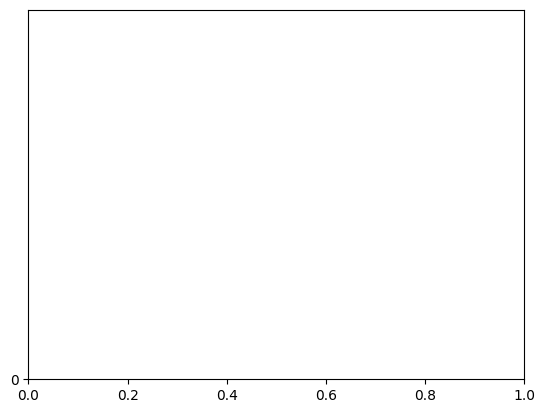

In [34]:
from matplotlib.pyplot import MultipleLocator

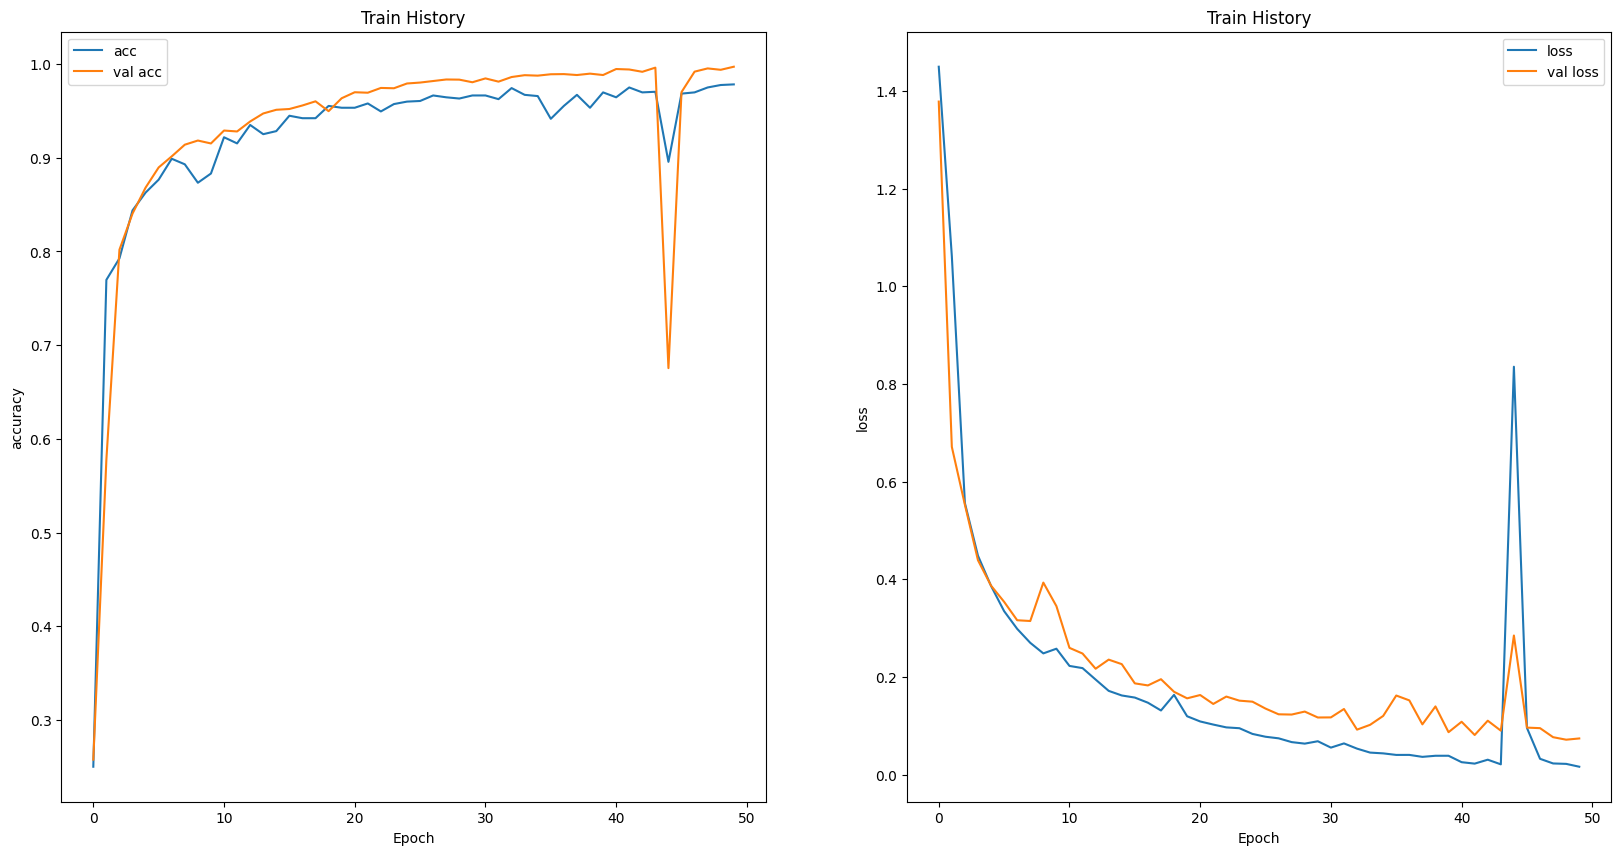

In [40]:
# 從history中取出訓練過程中的sparse_categorical_accuracy(準確率)值，並將其存儲在acc中
acc = history.history['sparse_categorical_accuracy']
# 從history中取出訓練過程中的validation_sparse_categorical_accuracy(驗證準確率)值，並將其存儲在val_acc中
val_acc = history.history['val_sparse_categorical_accuracy']
# 從history中取出訓練過程中的loss(損失)值，並將其存儲在loss中
loss = history.history['loss']
# 從history中取出訓練過程中的validation_loss(驗證損失)值，並將其存儲在val_loss中
val_loss = history.history['val_loss']


plt.figure(figsize=(20,10))
# 定位子圖，在一行中創建一個包含兩個子圖的畫布，目前定位於第一個子圖
plt.subplot(1, 2, 1)    
y=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(y)
# 繪製val_acc(驗證準確率)的折線圖，並給圖例標籤命名為"acc"      
plt.plot(val_acc, label='acc')  
# 繪製acc(訓練準確率)的折線圖，並給圖例標籤命名為"val acc"     
plt.plot(acc, label='val acc') 
plt.xlabel('Epoch')

plt.ylabel('accuracy')
# 設置子圖標題為"Train History"
plt.title('Train History')
# 創建圖例
plt.legend()

# 定位子圖，在一行中創建一個包含兩個子圖的畫布，目前定位於第二個子圖
plt.subplot(1, 2, 2)
y=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(y)
# 繪製 loss(訓練損失)的折線圖，並給圖例標籤命名為"loss"
plt.plot(loss, label='loss')    
# 繪製val_loss(驗證損失)的折線圖，並給圖例標籤命名為"val loss" 
plt.plot(val_loss, label='val loss') 
# 設置子圖標題為"Train History"  
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train History')
# 創建圖例
plt.legend()
# 顯示繪製的圖片
plt.show()

In [14]:
print('test accuracy',val_acc[-1])
print('test loss',val_loss[-1])

test accuracy 0.9783464670181274
test loss 0.07384157180786133
